## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import calendar
import calendar
from datetime import datetime

In [2]:
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

In [3]:
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline

In [5]:
np.set_printoptions(precision=2)

In [6]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from pathlib import Path
import heapq
from collections import defaultdict
import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [35]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 14.6 MB/s 


In [36]:
from dmba import regressionSummary

no display found. Using non-interactive Agg backend


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

In [9]:
df_sales_daily = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesdaily.csv')

In [10]:
df_sales_monthly = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesmonthly.csv')

In [11]:
df_sales_hourly = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/saleshourly.csv')

In [12]:
df_sales_weekly = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesweekly.csv')

In [13]:
df_sales_daily.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

## Data Analysis

### M01AB drug by Weekday

In [ ]:
df_sales_daily_M01AB = df_sales_daily[['M01AB', 'Weekday Name']]
result_M01AB = df_sales_daily_M01AB.groupby(['Weekday Name'], as_index=False).sum().sort_values('M01AB', ascending=False)

In [ ]:
df_sales_daily_M01AB.head()

M01AB Weekday Name
0    0.0     Thursday
1    8.0       Friday
2    2.0     Saturday
3    4.0       Sunday
4    5.0       Monday

In [ ]:
result_day_M01AB = result_M01AB.iloc[0,0]

In [ ]:
result_value_M01AB = round(result_M01AB.iloc[0,1], 2)

In [ ]:
print('The 1st drug, M01AB, was most frequently sold on ' + str(result_day_M01AB) 
      + ' with the volume of ' + str(result_value_M01AB))

The 1st drug, M01AB, was most frequently sold on Saturday with the volume of 1724.05


### M01AE drug by Weekday

In [ ]:
df_sales_daily_M01AE = df_sales_daily[['M01AE', 'Weekday Name']]
result_M01AE = df_sales_daily_M01AE.groupby(['Weekday Name'], as_index=False).sum().sort_values('M01AE', ascending=False)

In [ ]:
result_day_M01AE = result_M01AE.iloc[0,0]

In [ ]:
result_value_M01AE = round(result_M01AE.iloc[0,1], 2)

In [ ]:
print('The 2nd drug, M01AE, was most frequently sold on ' + str(result_day_M01AE) 
      + ' with the volume of ' + str(result_value_M01AE))

The 2nd drug, M01AE, was most frequently sold on Sunday with the volume of 1384.94


### N02BA drug by Weekday

In [ ]:
df_sales_daily_N02BA = df_sales_daily[['N02BA', 'Weekday Name']]
result_N02BA = df_sales_daily_N02BA.groupby(['Weekday Name'], as_index=False).sum().sort_values('N02BA', ascending=False)

In [ ]:
result_day_N02BA = result_N02BA.iloc[0,0]

In [ ]:
result_value_N02BA = round(result_N02BA.iloc[0,1], 2)

In [ ]:
print('The 3rd drug, N02BA, was most frequently sold on ' + str(result_day_N02BA) 
      + ' with the volume of ' + str(result_value_N02BA))

The 3rd drug, N02BA, was most frequently sold on Tuesday with the volume of 1272.97


### N02BE drug by Weekday

In [ ]:
df_sales_daily_N02BE = df_sales_daily[['N02BE', 'Weekday Name']]
result_N02BE = df_sales_daily_N02BE.groupby(['Weekday Name'], as_index=False).sum().sort_values('N02BE', ascending=False)

In [ ]:
result_day_N02BE = result_N02BE.iloc[0,0]

In [ ]:
result_value_N02BE = round(result_N02BE.iloc[0,1], 2)

In [ ]:
print('The 4th drug, N02BE, was most frequently sold on ' + str(result_day_N02BE) 
      + ' with the volume of ' + str(result_value_N02BE))

The 4th drug, N02BE, was most frequently sold on Saturday with the volume of 10107.5


### N05B drug by Weekday

In [ ]:
df_sales_daily_N05B = df_sales_daily[['N05B', 'Weekday Name']]
result_N05B = df_sales_daily_N05B.groupby(['Weekday Name'], as_index=False).sum().sort_values('N05B', ascending=False)

In [ ]:
result_day_N05B = result_N05B.iloc[0,0]

In [ ]:
result_value_N05B = round(result_N05B.iloc[0,1], 2)

In [ ]:
print('The 5th drug, N05B, was most frequently sold on ' + str(result_day_N05B) 
      + ' with the volume of ' + str(result_value_N05B))

The 5th drug, N05B, was most frequently sold on Wednesday with the volume of 3037.18


### N05C drug by Weekday

In [ ]:
df_sales_daily_N05C = df_sales_daily[['N05C', 'Weekday Name']]
result_N05C = df_sales_daily_N05C.groupby(['Weekday Name'], as_index=False).sum().sort_values('N05C', ascending=False)

In [ ]:
result_day_N05C = result_N05C.iloc[0,0]

In [ ]:
result_value_N05C = round(result_N05C.iloc[0,1], 2)

In [ ]:
print('The 6th drug, N05C, was most frequently sold on ' + str(result_day_N05C) 
      + ' with the volume of ' + str(result_value_N05C))

The 6th drug, N05C, was most frequently sold on Friday with the volume of 229.5


### R03 drug by Weekday

In [ ]:
df_sales_daily_R03 = df_sales_daily[['R03', 'Weekday Name']]
result_R03 = df_sales_daily_R03.groupby(['Weekday Name'], as_index=False).sum().sort_values('R03', ascending=False)

In [ ]:
result_day_R03 = result_R03.iloc[0,0]

In [ ]:
result_value_R03 = round(result_R03.iloc[0,1], 2)

In [ ]:
print('The 7th drug, R03, was most frequently sold on ' + str(result_day_R03) 
      + ' with the volume of ' + str(result_value_R03))

The 7th drug, R03, was most frequently sold on Monday with the volume of 1791.46


### R06 drug by Weekday

In [ ]:
df_sales_daily_R06 = df_sales_daily[['R06', 'Weekday Name']]
result_R06 = df_sales_daily_R06.groupby(['Weekday Name'], as_index=False).sum().sort_values('R06', ascending=False)

In [ ]:
result_day_R06 = result_R06.iloc[0,0]

In [ ]:
result_value_R06 = round(result_R06.iloc[0,1], 2)

In [ ]:
print('The 8th drug, R06, was most frequently sold on ' + str(result_day_R06) 
      + ' with the volume of ' + str(result_value_R06))

The 8th drug, R06, was most frequently sold on Saturday with the volume of 986.46


## Top 3 drugs gaving the largest sales in January 2015, July 2016, September 2017

In [ ]:
df_sales_monthly.head()

datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
0  2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2
1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7
4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7

In [ ]:
def top_3_drugs_by_month(month, year):
    month = str(month) if (month > 9) else '0' + str(month)
    year = str(year)

    # Filter by Date
    sales = df_sales_monthly.loc[df_sales_monthly['datum'].str.contains('^' + year + '\-' + month + '' , flags=re.I, regex=True)]
    
    # Reset index
    sales = sales.reset_index()
    
    # Filter chosen drugs
    top_Sales_by_Product = sales[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
    
    # Sort values horizontally in descending order
    top_Sales_by_Product = top_Sales_by_Product.sort_values(by=0, ascending=False, axis=1)
    
    # Print results
    print('Top 3 Drugs by Sale in ' + calendar.month_name[int(month)] + ' ' + year)
    for drug in top_Sales_by_Product.columns.values[0:3]:
        print(' - Product: ' + str(drug) + ', Volume sold: ' + str(round(top_Sales_by_Product[drug].iloc[0], 2)))
    print("\n")

In [ ]:
# Top 3 Drugs by Sale in January 2014
top_3_drugs_by_month(1, 2014)

# Top 3 Drugs by Sale in January 2015
top_3_drugs_by_month(1, 2015)

# Top 3 Drugs by Sale in July 2016
top_3_drugs_by_month(7, 2016)

# Top 3 Drugs by Sale in September 2017
top_3_drugs_by_month(9, 2017)

Top 3 Drugs by Sale in January 2014
 - Product: N02BE, Volume sold: 878.03
 - Product: N05B, Volume sold: 354.0
 - Product: N02BA, Volume sold: 152.1


Top 3 Drugs by Sale in January 2015
 - Product: N02BE, Volume sold: 1044.24
 - Product: N05B, Volume sold: 463.0
 - Product: R03, Volume sold: 177.25


Top 3 Drugs by Sale in July 2016
 - Product: N02BE, Volume sold: 652.36
 - Product: N05B, Volume sold: 240.0
 - Product: M01AB, Volume sold: 203.97


Top 3 Drugs by Sale in September 2017
 - Product: N02BE, Volume sold: 863.75
 - Product: N05B, Volume sold: 223.0
 - Product: R03, Volume sold: 139.0




## Top 1 Drug sold on Mondays in years

In [ ]:
df_sales_daily = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesdaily.csv')

In [ ]:
df_sales_daily.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

### 2014

In [ ]:
df_sales_daily_2014 = df_sales_daily.loc[df_sales_daily['datum'].str.contains('2014', flags=re.I, regex=True) & (df_sales_daily['Weekday Name'] == 'Monday')]

In [ ]:
df_sales_daily_2014 = df_sales_daily_2014.groupby(['Weekday Name'], as_index=False).sum()

In [ ]:
df_sales_daily_2014 = df_sales_daily_2014[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result_2014 = df_sales_daily_2014.sort_values(by=0, ascending=False, axis=1)
for field in result_2014.columns.values[0:1]:
    print('The most frequently sold Drug on Mondays in 2014 is ' + str(field) + ' with the Volume of ' + str(round(result_2014[field].iloc[0], 2)))

The most frequently sold Drug on Mondays in 2014 is N02BE with the Volume of 1337.46


### 2015

In [ ]:
df_sales_daily_2015 = df_sales_daily.loc[df_sales_daily['datum'].str.contains('2015', flags=re.I, regex=True) & (df_sales_daily['Weekday Name'] == 'Monday')]

In [ ]:
df_sales_daily_2015 = df_sales_daily_2015.groupby(['Weekday Name'], as_index=False).sum()

In [ ]:
df_sales_daily_2015 = df_sales_daily_2015[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result_2015 = df_sales_daily_2015.sort_values(by=0, ascending=False, axis=1)
for field in result_2015.columns.values[0:1]:
    print('The most frequently sold Drug on Mondays in 2015 is ' + str(field) + ' with the Volume of ' + str(round(result_2015[field].iloc[0], 2)))

The most frequently sold Drug on Mondays in 2015 is N02BE with the Volume of 1915.91


### 2016

In [ ]:
df_sales_daily_2016 = df_sales_daily.loc[df_sales_daily['datum'].str.contains('2016', flags=re.I, regex=True) & (df_sales_daily['Weekday Name'] == 'Monday')]

In [ ]:
df_sales_daily_2016 = df_sales_daily_2016.groupby(['Weekday Name'], as_index=False).sum()

In [ ]:
df_sales_daily_2016 = df_sales_daily_2016[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result_2016 = df_sales_daily_2016.sort_values(by=0, ascending=False, axis=1)
for field in result_2016.columns.values[0:1]:
    print('The most frequently sold Drug on Mondays in 2016 is ' + str(field) + ' with the Volume of ' + str(round(result_2016[field].iloc[0], 2)))

The most frequently sold Drug on Mondays in 2016 is N02BE with the Volume of 1724.8


### 2017

#### Filter out all except Mondays in 2017

In [ ]:
df_sales_daily_2017 = df_sales_daily.loc[df_sales_daily['datum'].str.contains('2017', flags=re.I, regex=True) & (df_sales_daily['Weekday Name'] == 'Monday')]

#### Group by Weekday and Sum up

In [ ]:
df_sales_daily_2017 = df_sales_daily_2017.groupby(['Weekday Name'], as_index=False).sum()

#### Filter by the chosen Drugs and Sort by descending order

In [ ]:
df_sales_daily_2017 = df_sales_daily_2017[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result_2017 = df_sales_daily_2017.sort_values(by=0, ascending=False, axis=1)

In [ ]:
for field in result_2017.columns.values[0:1]:
    print('The most frequently sold Drug on Mondays in 2017 is ' + str(field) + ' with the Volume of ' + str(round(result_2017[field].iloc[0], 2)))

The most frequently sold Drug on Mondays in 2017 is N02BE with the Volume of 1160.56


## Time Series Analysis

In [ ]:
df_sales_daily = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesdaily.csv')

In [ ]:
df_sales_daily.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

### Seasonality Analysis


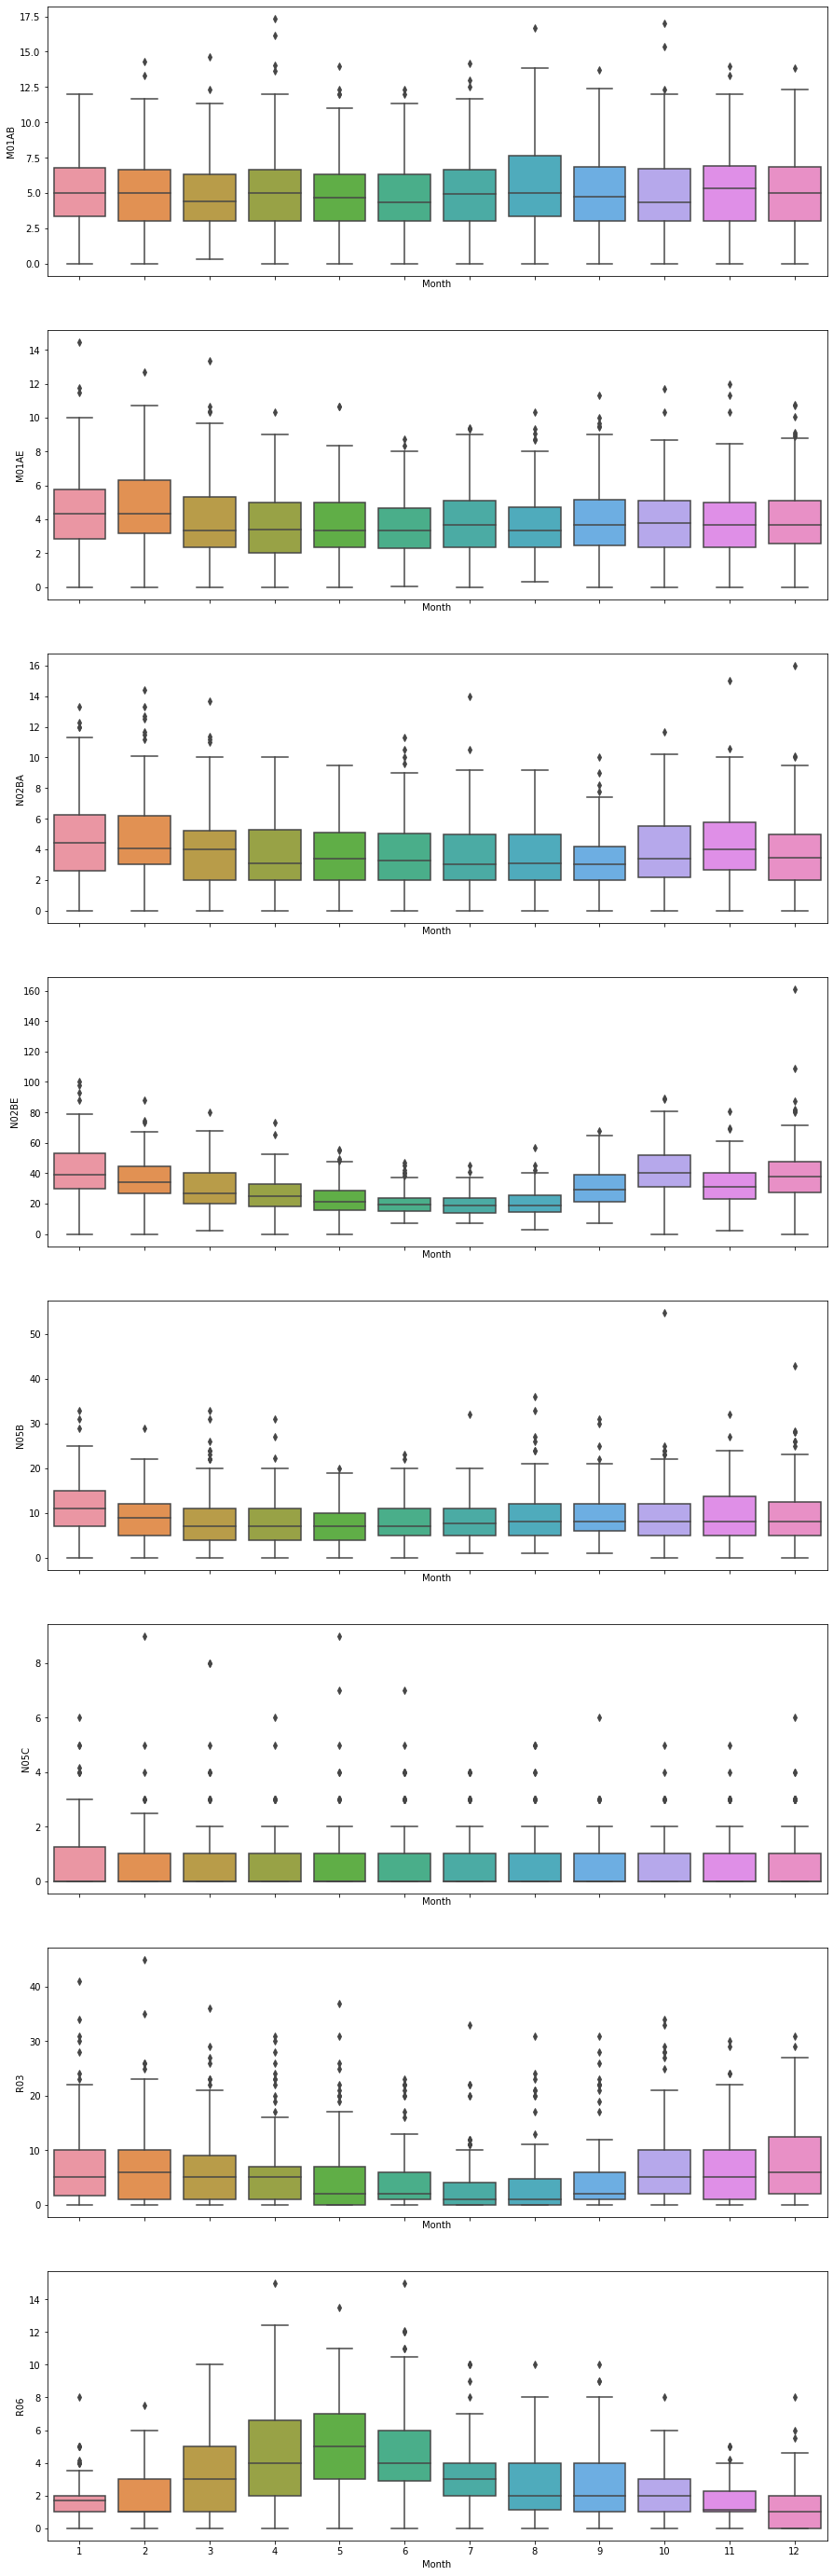

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(15, 50), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_sales_daily, x='Month', y=name, ax=ax)

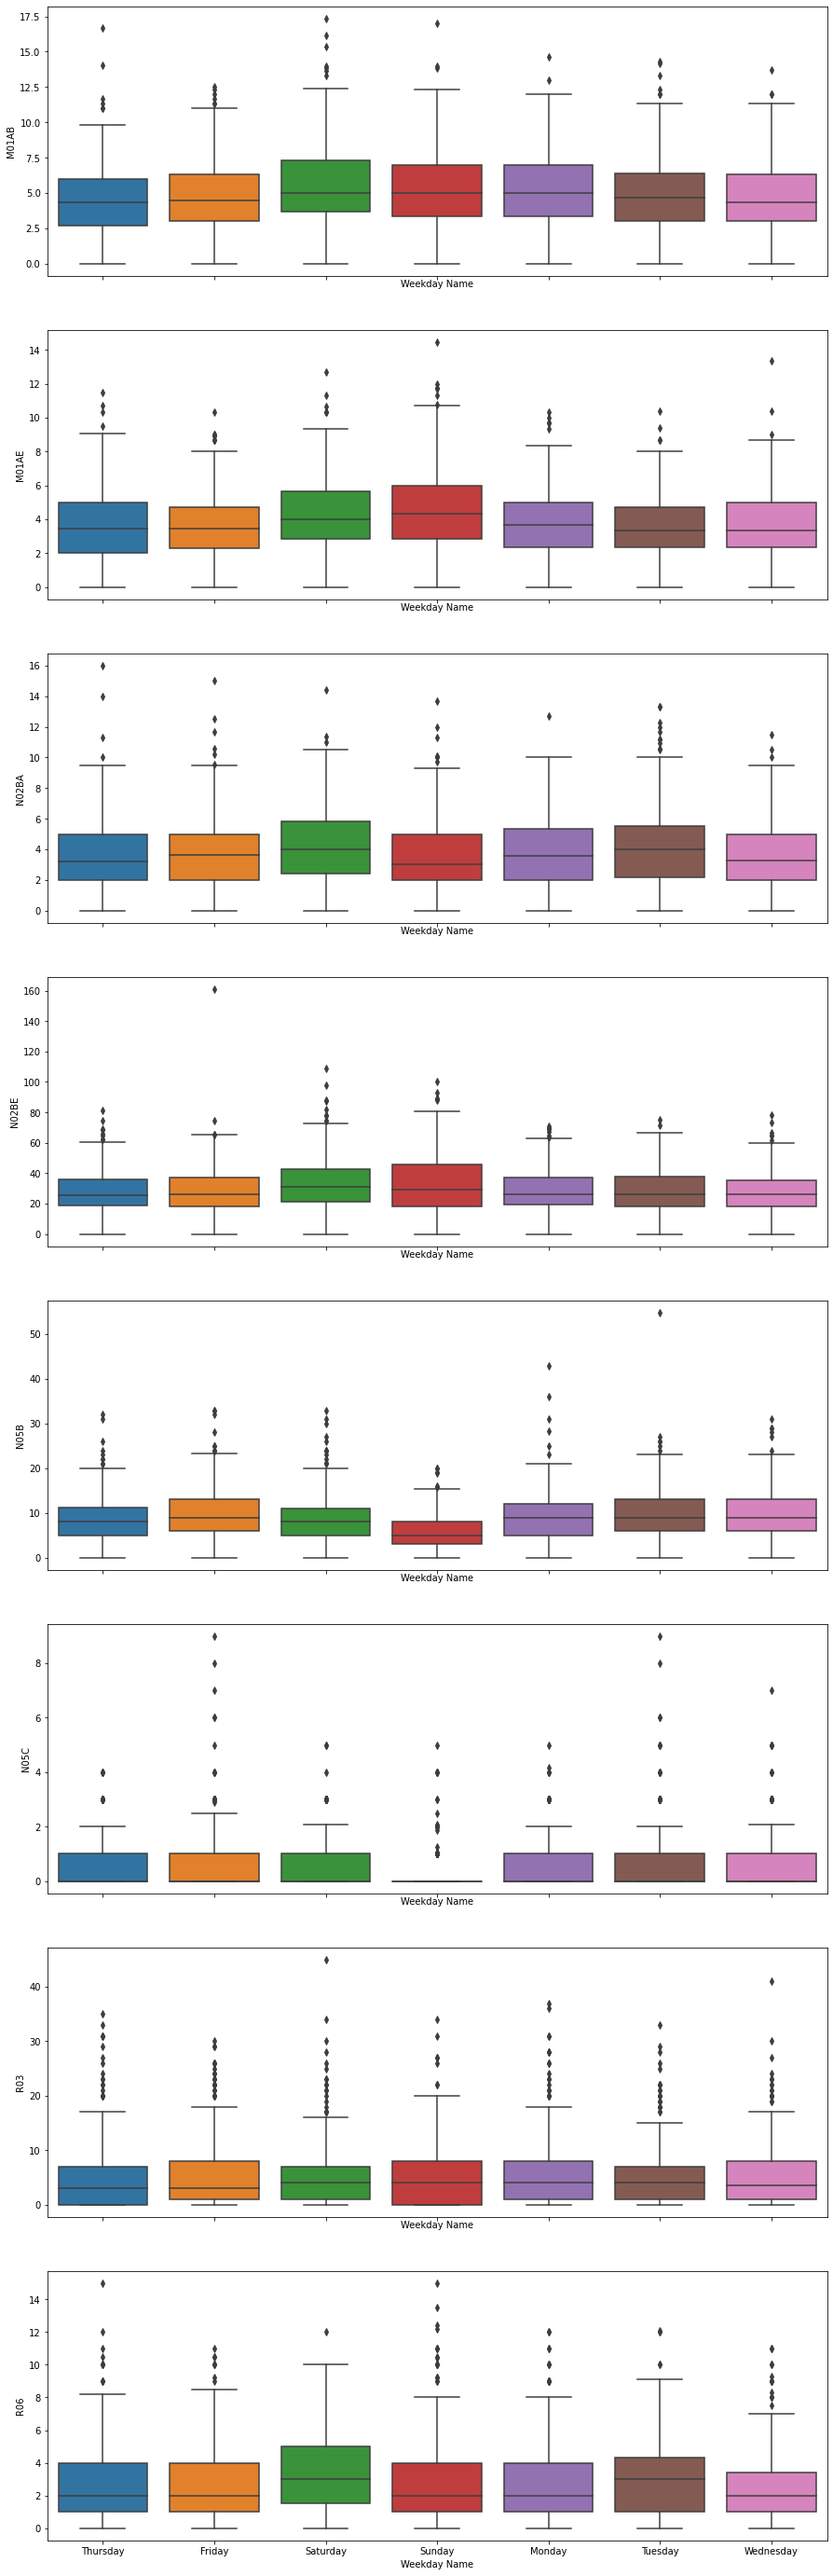

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(15, 50), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_sales_daily, x='Weekday Name', y=name, ax=ax)

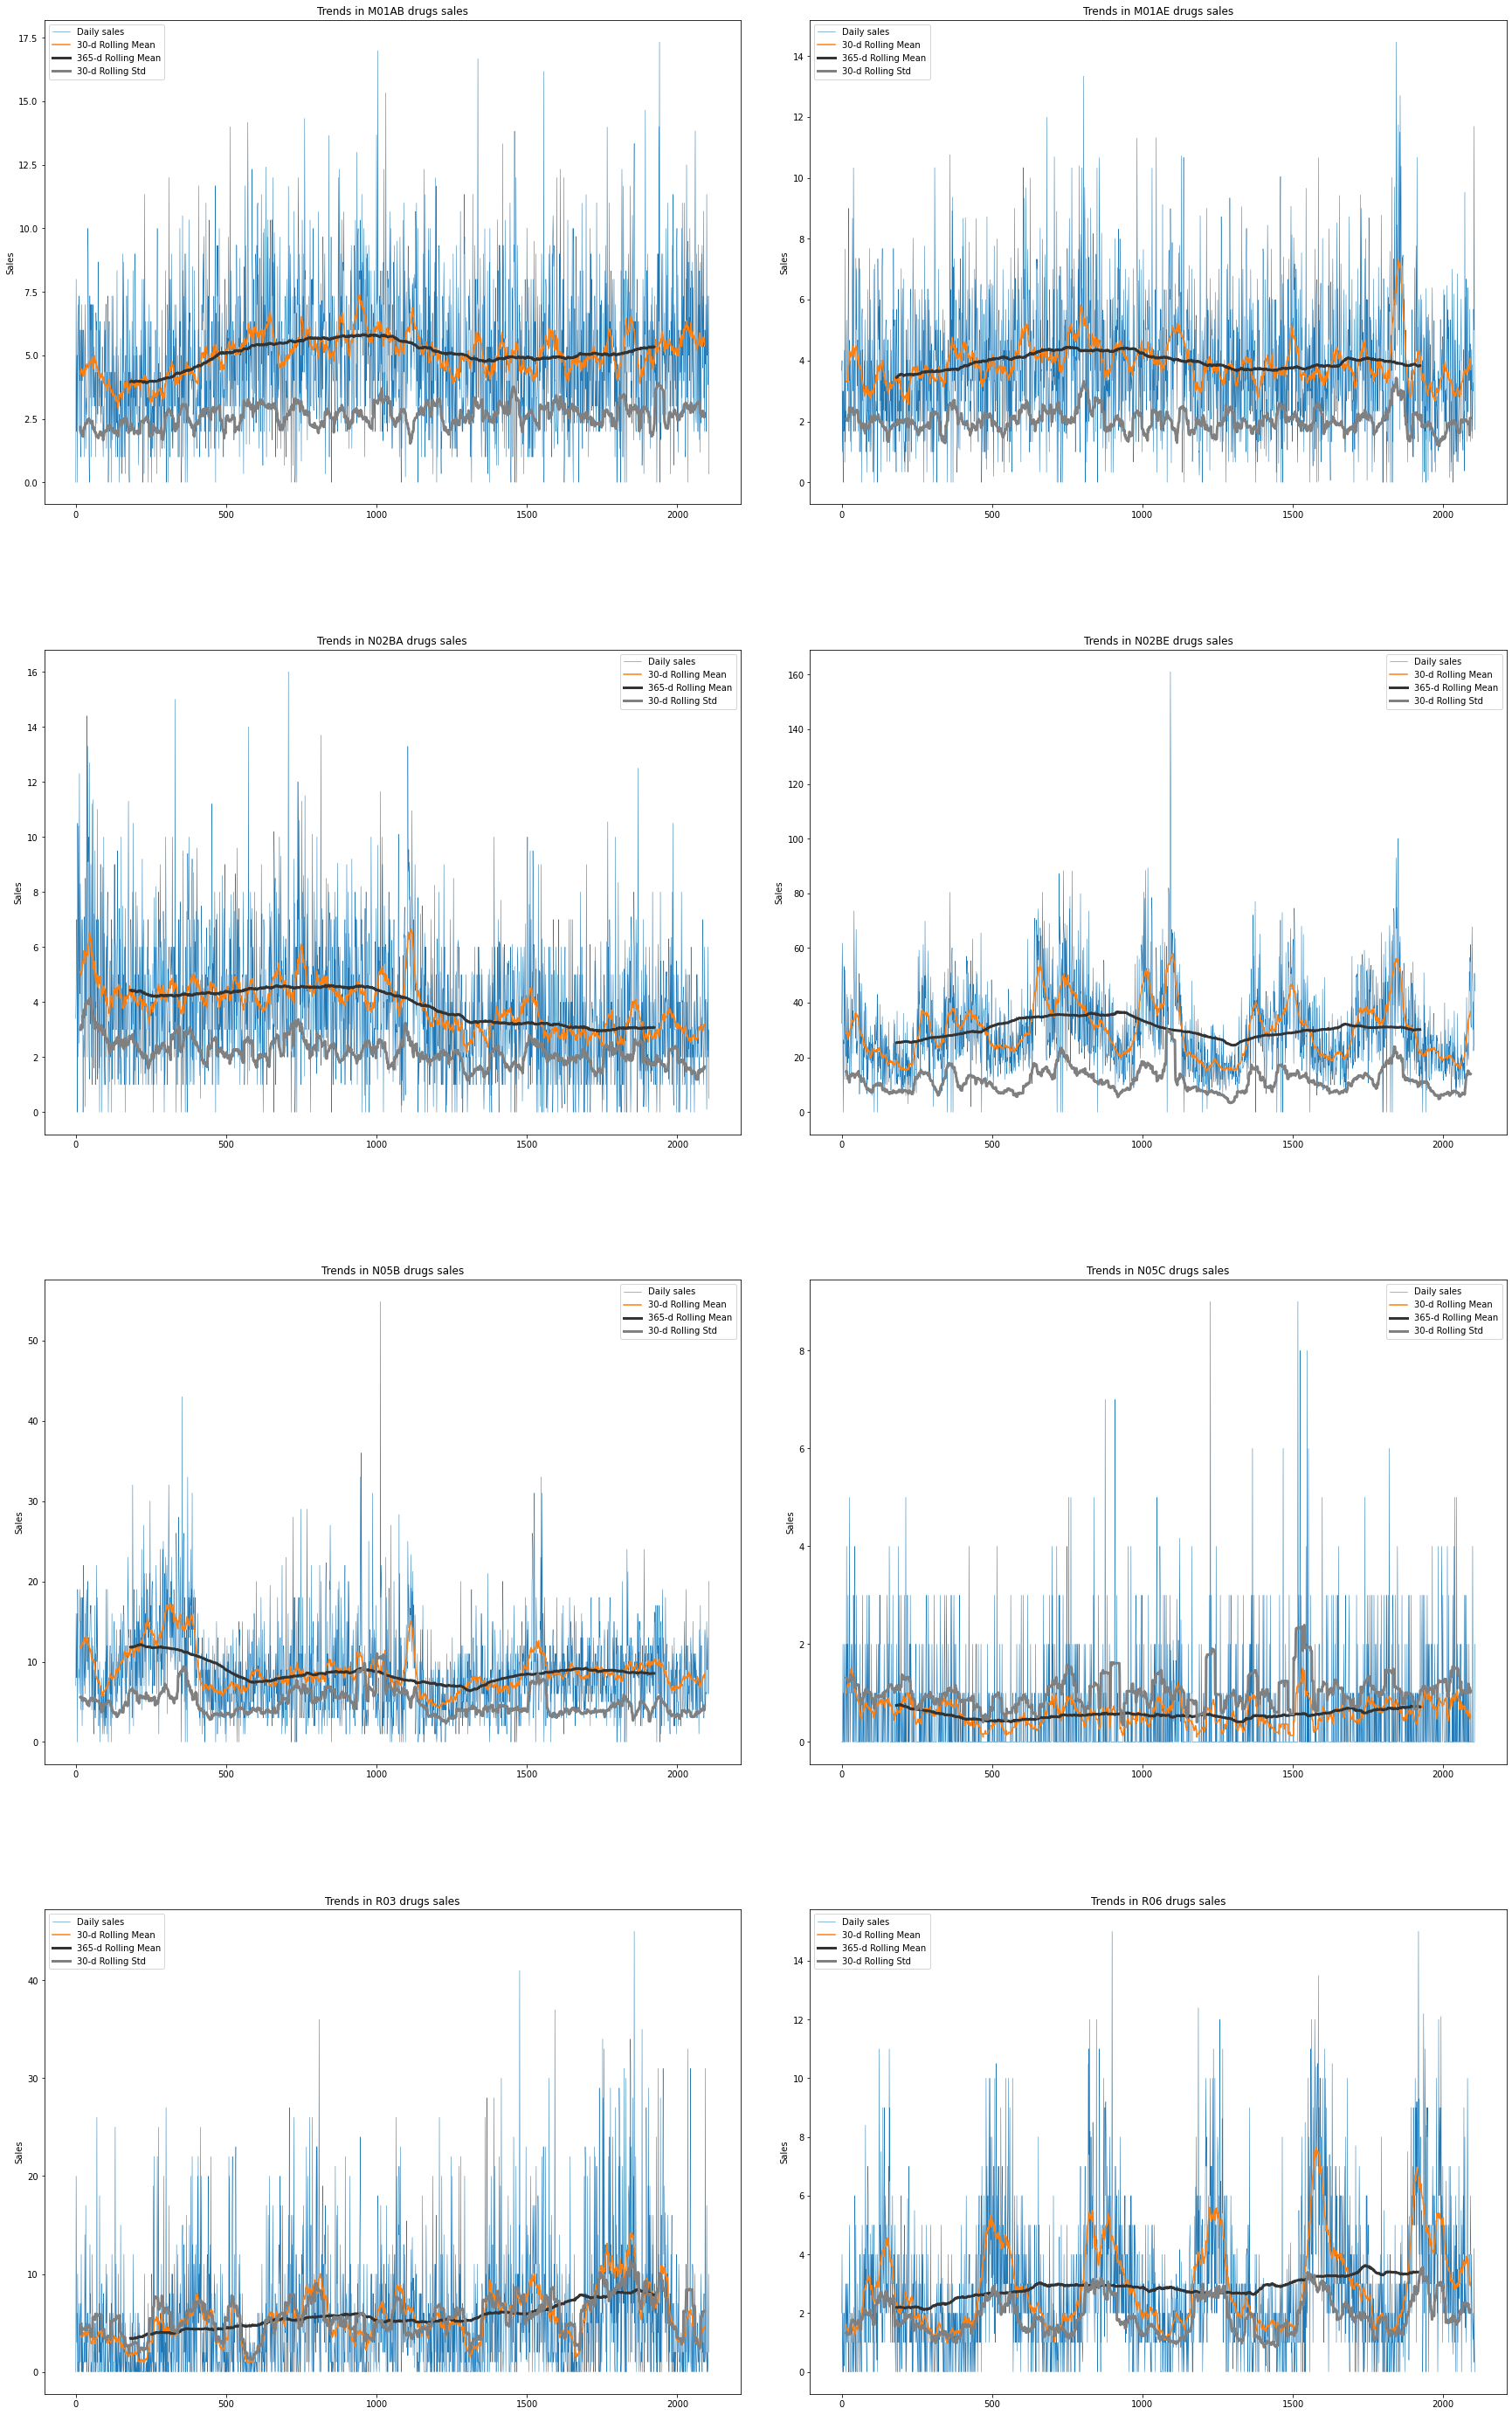

In [ ]:
cols_plot = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
dfatc_365d = df_sales_daily[cols_plot].rolling(window=365, center=True).mean()
dfatc_30d = df_sales_daily[cols_plot].rolling(30, center=True).mean()
dfatc_std = df_sales_daily[cols_plot].rolling(30, center=True).std()
subplotindex = 0
numrows = 4
numcols = 2
fig, ax = plt.subplots(numrows, numcols, figsize=(30, 50))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(df_sales_daily.loc[:,x], linewidth=0.5, label='Daily sales')
    ax[rowindex,colindex].plot(dfatc_30d.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_365d.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_std.loc[:,x], color='0.5', linewidth=3, label='30-d Rolling Std')
    ax[rowindex,colindex].set_ylabel('Sales')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in ' + x + ' drugs sales');   
    subplotindex = subplotindex + 1
plt.show()

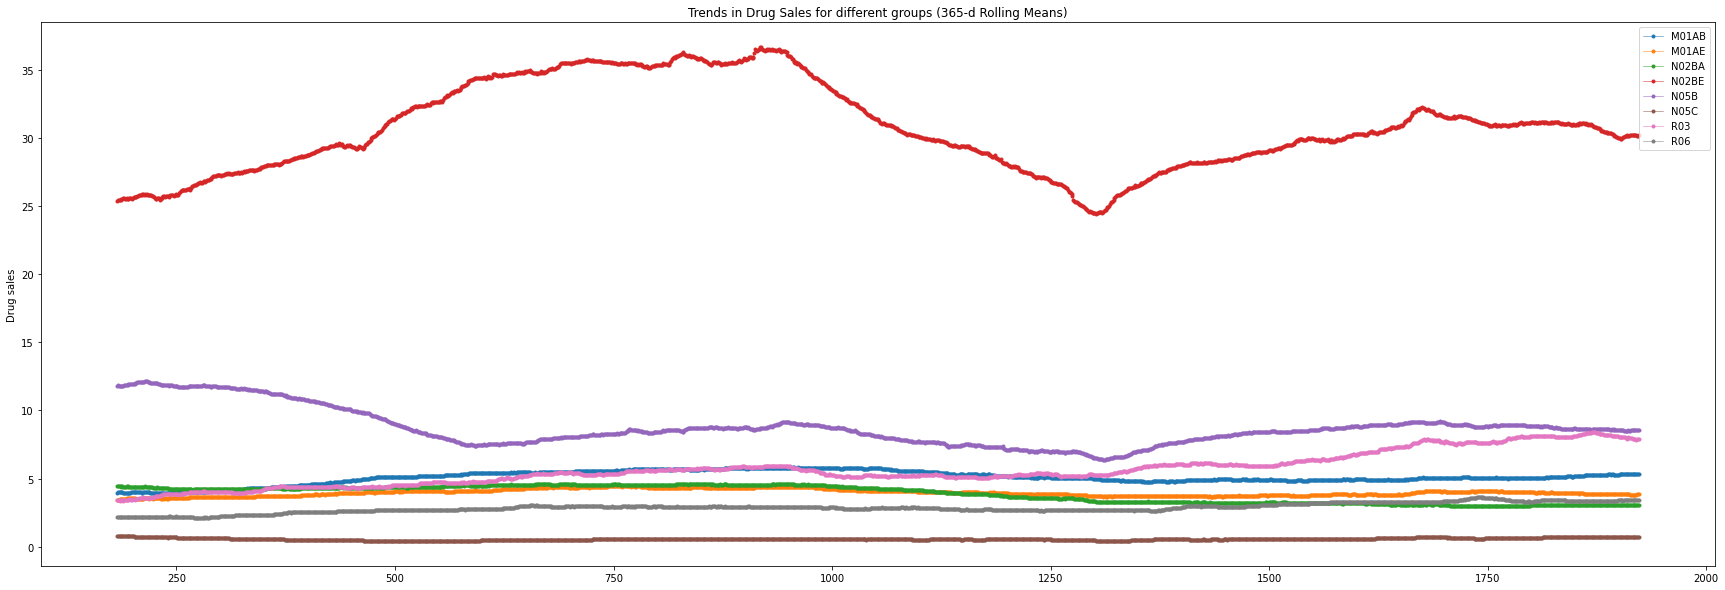

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
for nm in cols_plot:
    ax.plot(dfatc_365d[nm], label=nm, marker='.', linestyle='-', linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Drug sales')
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)');

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


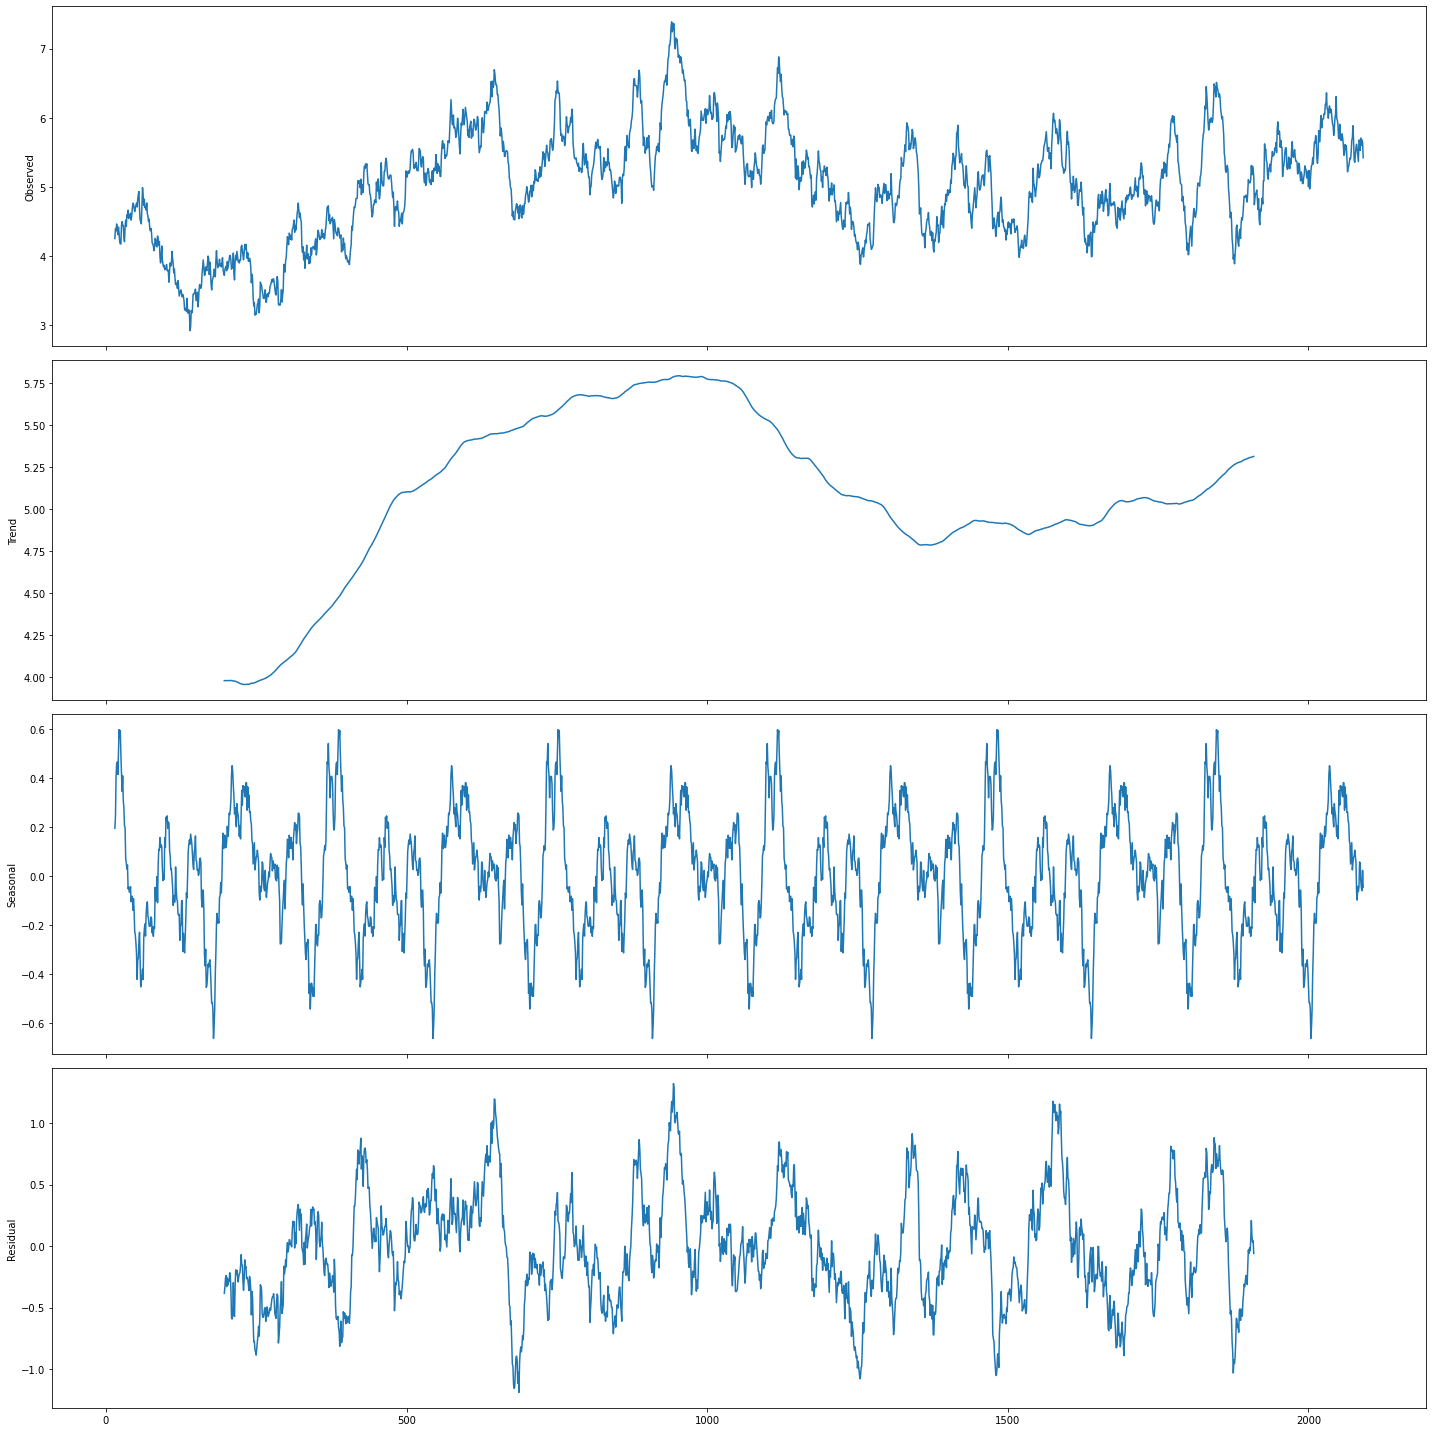

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_sales_daily['M01AB'].rolling(30, center=True).mean().dropna(), freq=365, filt=None)
plt.rcParams["figure.figsize"] = (20,20)
result.plot()
plt.show()

In [ ]:
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    result = seasonal_decompose(df_sales_weekly[x], freq=52, model = 'additive')
    dfs = pd.concat([result.trend, result.seasonal, result.resid, result.observed], axis=1)
    dfs.columns = ['trend', 'seasonal', 'residuals', 'observed']
    dfs = dfs.dropna()
    res = dfs['residuals'].values
    obs = dfs['observed'].values
    resmean = np.mean(np.abs(res))
    obsmean = np.mean(np.abs(obs))
    perc = resmean*100/obsmean
    print(x + ' RESMEAN:' + str(resmean) + ', OBSMEAN:' + str(obsmean) + ', PERC:' + str(perc) + '%')

M01AB RESMEAN:5.26715996284115, OBSMEAN:35.59490833332001, PERC:14.797509558159527%
M01AE RESMEAN:4.319542609675869, OBSMEAN:28.00801458336, PERC:15.422523423856601%
N02BA RESMEAN:3.9228389592521657, OBSMEAN:27.083016, PERC:14.484498178682042%
N02BE RESMEAN:29.534357236963668, OBSMEAN:217.6597028336, PERC:13.569051529737028%
N05B RESMEAN:12.94840305932125, OBSMEAN:61.96614999972, PERC:20.895929566997072%
N05C RESMEAN:2.0384606385595405, OBSMEAN:3.871833333332, PERC:52.648460382081936%
R03 RESMEAN:11.722244335544508, OBSMEAN:40.06845833336, PERC:29.25554119906046%
R06 RESMEAN:4.278758416393868, OBSMEAN:19.744589999960002, PERC:21.67053565762842%


### Stationarity Analysis

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    dftest = adfuller(df_sales_weekly[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for M01AB
-----------------------------
Test statistic = -3.700
P-value = 0.022
Critical values :
	1%: -3.9897903649837616 - The data is not stationary with 99% confidence
	5%: -3.425478311521626 - The data is  stationary with 95% confidence
	10%: -3.1358607194990724 - The data is  stationary with 90% confidence
ADF test for M01AE
-----------------------------
Test statistic = -8.717
P-value = 0.000
Critical values :
	1%: -3.98926783537037 - The data is  stationary with 99% confidence
	5%: -3.425226747185185 - The data is  stationary with 95% confidence
	10%: -3.1357131066666666 - The data is  stationary with 90% confidence
ADF test for N02BA
-----------------------------
Test statistic = -2.670
P-value = 0.249
Critical values :
	1%: -3.990441532957606 - The data is not stationary with 99% confidence
	5%: -3.425791763669738 - The data is not stationary with 95% confidence
	10%: -3.1360446341572343 - The data is not stationary with 90% confidence
ADF test for N02BE
------------

In [ ]:
from statsmodels.tsa.stattools import kpss
#warnings.filterwarnings("ignore")

In [ ]:
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    print(" > Is " + x + " data stationary ?")
    dftest = kpss(np.log(df_sales_weekly[x]), 'ct')
    print("Test statistic = {:.3f}".format(dftest[1]))
    print("Critical values: ")
    for k, v in dftest[3].items():
        print("\t{}: {}".format(k, v))

 > Is M01AB data stationary ?
Test statistic = 0.010
Critical values: 
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is M01AE data stationary ?
Test statistic = 0.010
Critical values: 
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BA data stationary ?
Test statistic = 0.049
Critical values: 
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BE data stationary ?
Test statistic = 0.100
Critical values: 
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05B data stationary ?
Test statistic = 0.056
Critical values: 
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05C data stationary ?
Test statistic = nan
Critical values: 
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R03 data stationary ?
Test statistic = 0.100
Critical values: 
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R06 data stationary ?
Test statistic = 0.100
Critical values: 
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-valu

### Regularity Analysis

In [ ]:
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [ ]:
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    print(x + ': ' + str(ApEn(df_sales_weekly[x].values, m=2, r=0.2*np.std(df_sales_weekly[x].values))))

M01AB: 1.141130089570642
M01AE: 1.166363924596575
N02BA: 1.1370638730125302
N02BE: 1.058024809082593
N05B: 1.074437415034502
N05C: 1.0361887401424648
R03: 1.1847216239035152
R06: 1.031759595747876


### Autocorrelation analysis

## Sales Prediction with Machine Learning

### Predict the pharma sales in January 2020


In [ ]:
def scatterData(X_train, y_train, X_test, y_test, title):
    plt.title('Prediction using ' + title)
    plt.xlabel('Month sequence', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

    # Use Matplotlib Scatter Plot
    plt.scatter(X_train, y_train, color='blue', label='Training observation points')
    plt.scatter(X_test, y_test, color='cyan', label='Testing observation points')

### Linear Regression

In [ ]:
def predictLinearRegression(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Linear Regression')

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    plt.plot(X_train, reg.predict(X_train), color='red', label='Linear regressor')
    plt.legend()
    plt.show()

    # LINEAR REGRESSION - Predict/Test model
    y_predict_linear = reg.predict(X_test)

    # LINEAR REGRESSION - Predict for January 2020
    linear_predict = reg.predict([[predictFor]])
    # linear_predict = reg.predict([[predictFor]])[0]

    # LINEAR REGRESSION - Accuracy
    accuracy = reg.score(X_train, y_train)

    # LINEAR REGRESSION - Error
    # error = round(np.mean((y_predict_linear-y_test)**2), 2)
    
    # Results
    print('Linear Regression: ' + str(linear_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')

    return {'regressor':reg, 'values':linear_predict}

### Polynomial Regression

In [ ]:
def predictPolynomialRegression(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Polynomial Regression')
    
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg_model = linear_model.LinearRegression()
    poly_reg_model.fit(X_poly, y_train)
    plt.plot(X_train, poly_reg_model.predict(poly_reg.fit_transform(X_train)), color='green', label='Polynomial regressor')
    plt.legend()
    plt.show()

    # Polynomial Regression - Predict/Test model
    y_predict_polynomial = poly_reg_model.predict(X_poly)

    # Polynomial Regression - Predict for January 2020
    polynomial_predict = poly_reg_model.predict(poly_reg.fit_transform([[predictFor]]))

    # Polynomial Regression - Accuracy
    # X_poly_test = poly_reg.fit_transform(X_test)
    accuracy = poly_reg_model.score(X_poly, y_train)

    # Polynomial Regression - Error
    # error = round(np.mean((y_predict_polynomial-y_train)**2), 2)

    # Result
    print('Polynomial Regression: ' + str(polynomial_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':poly_reg_model, 'values':polynomial_predict}

### Simple Vector Regression (SVR)

In [ ]:
def predictSVR(X_train, y_train, X_test, y_test):

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scatterData(X_train, y_train, X_test, y_test, 'Simple Vector Regression (SVR)')

    svr_regressor = SVR(kernel='rbf', gamma='auto')
    svr_regressor.fit(X_train, y_train.ravel())

    # plt.scatter(X_train, y_train, color='red', label='Actual observation points')
    plt.plot(X_train, svr_regressor.predict(X_train), label='SVR regressor')
    plt.legend()
    plt.show()

    # Simple Vector Regression (SVR) - Predict/Test model
    y_predict_svr = svr_regressor.predict(X_test)

    # Simple Vector Regression (SVR) - Predict for January 2020
    svr_predict = svr_regressor.predict([[predictFor]])

    # Simple Vector Regression (SVR) - Accuracy
    accuracy = svr_regressor.score(X_train, y_train)

    # Simple Vector Regression (SVR) - Error
    # error = round(np.mean((y_predict_svr-y_train)**2), 2)
    
    # Result
    print('Simple Vector Regression (SVR): ' + str(svr_predict) + ' (Accuracy: ' + str(round(accuracy*100)) + '%)')
    return {'regressor':svr_regressor, 'values':svr_predict}

### Define a pharma product

In [ ]:
product_N02BA = 'N02BA'

In [ ]:
regResults_N02BA = pd.DataFrame(columns=('Linear', 'Polynomial', 'SVR', 'Voting Regressor'), index=[product_N02BA])

In [ ]:
rcParams['figure.figsize'] = 12, 8

In [ ]:
df_sales_monthly = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesmonthly.csv')

In [ ]:
df_sales_monthly = df_sales_monthly.loc[df_sales_monthly['datum'].str.contains("2014") | df_sales_monthly['datum'].str.contains("2015") | df_sales_monthly['datum'].str.contains("2016") | df_sales_monthly['datum'].str.contains("2017") | df_sales_monthly['datum'].str.contains("2018") | df_sales_monthly['datum'].str.contains("2019")]
df_sales_monthly = df_sales_monthly.reset_index()

In [ ]:
df_sales_monthly

index       datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03  \
0       0  2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   
1       1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   
2       2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   
3       3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   
4       4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0   
..    ...         ...     ...      ...      ...       ...    ...   ...    ...   
65     65  2019-06-30  151.54  101.627  103.200   610.000  193.0  25.0  142.0   
66     66  2019-07-31  181.00  103.541   92.800   649.800  250.6  20.0  115.0   
67     67  2019-08-31  181.91   88.269   84.200   518.100  237.0  26.0  145.0   
68     68  2019-09-30  161.07  111.437   93.500   984.480  227.8  16.0  161.0   
69     69  2019-10-31   44.37   37.300   20.650   295.150   86.0   7.0   37.0   

       R06  
0    48.20  
1    36.20  
2    85.40  
3    73.70  
4   123.70  
..     ...  
65  156.04  
66  105.20  
67   97.30  
68  109.10  
69   11.13  

[70 rows x 10 columns]

In [ ]:
df_sales_monthly['datumNumber'] = 1
for index, row in df_sales_monthly.iterrows():
    df_sales_monthly.loc[index, 'datumNumber'] = index+1

In [ ]:
# the first and the last available month is quite low which may indicate that it might be incomplete
# and skewing results so we're dropping it
df_sales_monthly.drop(df_sales_monthly.head(1).index,inplace=True)
df_sales_monthly.drop(df_sales_monthly.tail(1).index,inplace=True)

In [ ]:
df_sales_monthly = df_sales_monthly[df_sales_monthly[product_N02BA] != 0]

In [ ]:
df_sales_monthly.head()

index       datum   M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03  \
1      1  2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   
2      2  2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   
3      3  2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   
4      4  2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0   
5      5  2014-06-30  112.07   94.710  122.900   548.225  323.0  23.0   57.0   

     R06  datumNumber  
1   36.2            2  
2   85.4            3  
3   73.7            4  
4  123.7            5  
5  109.3            6

In [ ]:
predictFor = len(df_sales_monthly) + 5

In [ ]:
print('Predictions for the product ' + str(product_N02BA) + ' sales in January 2020')

Predictions for the product N02BA sales in January 2020


In [ ]:
regValues_N02BA = {}

In [ ]:
dfSplit_N02BA = df_sales_monthly[['datumNumber', product_N02BA]]

# We are going to keep 30% of the dataset in test dataset
train, test = train_test_split(dfSplit_N02BA, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product_N02BA].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product_N02BA].values

### Feature Scaling

To improve the performance of the model

In [ ]:
# scale_X = StandardScaler()
# scale_y = StandardScaler()

# X_train = scale_X.fit_transform(X_train)
# y_train = scale_y.fit_transform(y_train.reshape(-1, 1))

# X_test = scale_X.fit_transform(X_test)
# y_test = scale_y.fit_transform(y_test.reshape(-1, 1))

### Performance

### Linear Regression

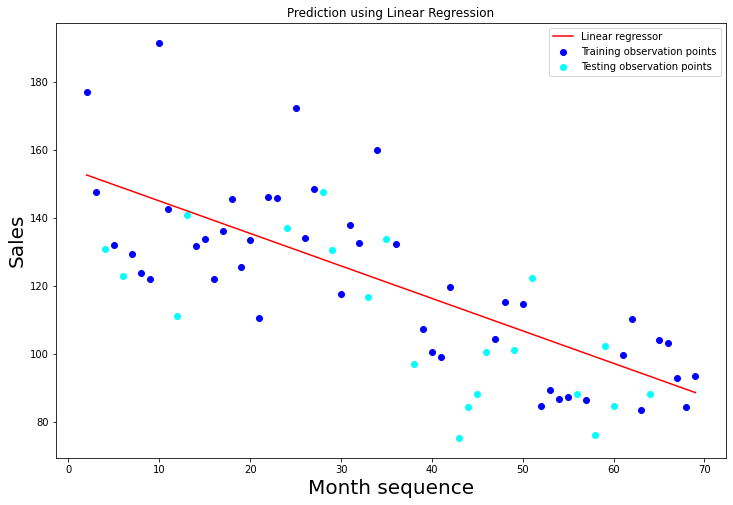

Linear Regression: [[85.72]] (Accuracy: 58%)


In [ ]:
linearResult_N02BA = predictLinearRegression(X_train, y_train, X_test, y_test)
reg_N02BA = linearResult_N02BA['regressor']
regValues_N02BA['Linear'] = round(linearResult_N02BA['values'][0][0])

#### Polynomial Regression

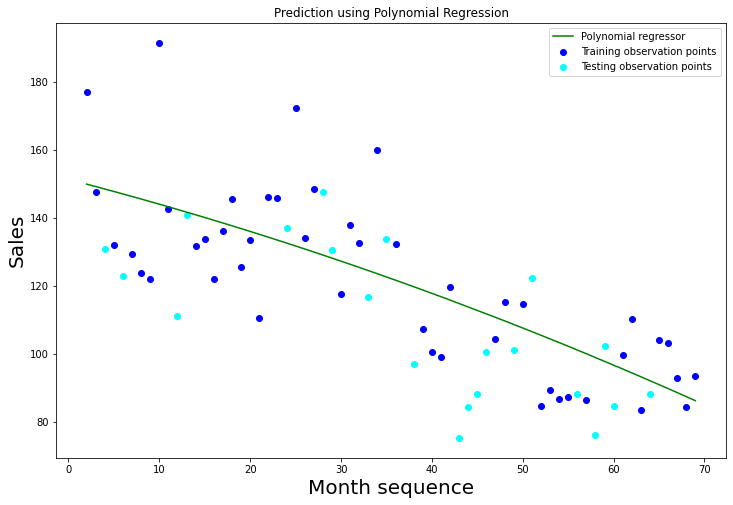

Polynomial Regression: [[82.59]] (Accuracy: 58%)


In [ ]:
polynomialResult_N02BA = predictPolynomialRegression(X_train, y_train, X_test, y_test)
polynomial_regressor_N02BA = polynomialResult_N02BA['regressor']
regValues_N02BA['Polynomial'] = round(polynomialResult_N02BA['values'][0][0])

#### Simple Vector Regression (SVR)

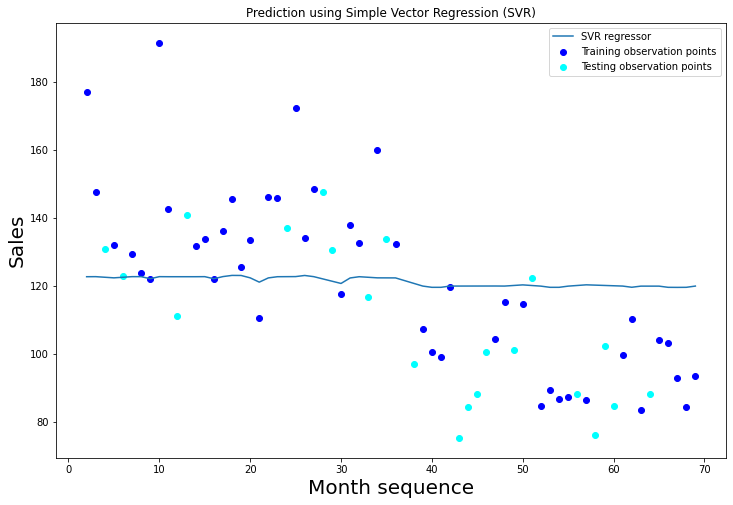

Simple Vector Regression (SVR): [121.33] (Accuracy: 9%)


In [ ]:
svrResult_N02BA = predictSVR(X_train, y_train, X_test, y_test)
svr_regressor_N02BA = svrResult_N02BA['regressor']
regValues_N02BA['SVR'] = round(svrResult_N02BA['values'][0])

#### Voting Regressor

In [ ]:
vRegressor_N02BA = VotingRegressor(estimators=[('reg', reg_N02BA), ('polynomial_regressor', polynomial_regressor_N02BA), ('svr_regressor', svr_regressor_N02BA)])

vRegressorRes = vRegressor_N02BA.fit(X_train, y_train.ravel())

# VotingRegressor - Predict for January 2020
vRegressor_predict_N02BA = vRegressor_N02BA.predict([[predictFor]])
regValues_N02BA['Voting Regressor'] = round(vRegressor_predict_N02BA[0])
print('Voting Regressor January 2020 predicted value: ' + str(round(vRegressor_predict_N02BA[0])))
regResults_N02BA.loc[product_N02BA] = regValues_N02BA

Voting Regressor January 2020 predicted value: 98


In [ ]:
regResults_N02BA

Linear Polynomial  SVR Voting Regressor
N02BA     86         83  121               98

### Association Rules (Market Basket Analysis)

In [ ]:
df_sales_daily_products = df_sales_daily.copy()
df_sales_daily_products.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

In [ ]:
df_sales_daily_products = df_sales_daily_products[['datum',	'M01AB',	'M01AE',	'N02BA', 'N02BE', 'N05B',	'N05C',	'R03',	'R06']]
df_sales_daily_products.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0

In [ ]:
df_sales_daily_products.set_index('datum', inplace=True)
df_sales_daily_products

M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06
datum                                                         
1/2/2014    0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00
1/3/2014    8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00
1/4/2014    2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00
1/5/2014    4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00
1/6/2014    5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00
...          ...     ...    ...    ...   ...   ...   ...   ...
10/4/2019   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00
10/5/2019   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33
10/6/2019   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20
10/7/2019   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00
10/8/2019   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00

[2106 rows x 8 columns]

In [ ]:
df_sales_daily_products['M01AB'] = (df_sales_daily_products['M01AB'] > 0).astype(int)
df_sales_daily_products

M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06
datum                                                         
1/2/2014       0   3.670   3.40  32.40   7.0   0.0   0.0  2.00
1/3/2014       1   4.000   4.40  50.60  16.0   0.0  20.0  4.00
1/4/2014       1   1.000   6.50  61.85  10.0   0.0   9.0  1.00
1/5/2014       1   3.000   7.00  41.10   8.0   0.0   3.0  0.00
1/6/2014       1   1.000   4.50  21.70  16.0   2.0   6.0  2.00
...          ...     ...    ...    ...   ...   ...   ...   ...
10/4/2019      1   5.683   2.25  22.45  13.0   0.0   1.0  1.00
10/5/2019      1   5.010   6.00  25.40   7.0   0.0   0.0  0.33
10/6/2019      1  11.690   2.00  34.60   6.0   0.0   5.0  4.20
10/7/2019      1   4.507   3.00  50.80   6.0   0.0  10.0  1.00
10/8/2019      1   1.730   0.50  44.30  20.0   2.0   2.0  0.00

[2106 rows x 8 columns]

In [ ]:
df_sales_daily_products['M01AE'] = (df_sales_daily_products['M01AE'] > 0).astype(int)
df_sales_daily_products

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03   R06
datum                                                        
1/2/2014       0      1   3.40  32.40   7.0   0.0   0.0  2.00
1/3/2014       1      1   4.40  50.60  16.0   0.0  20.0  4.00
1/4/2014       1      1   6.50  61.85  10.0   0.0   9.0  1.00
1/5/2014       1      1   7.00  41.10   8.0   0.0   3.0  0.00
1/6/2014       1      1   4.50  21.70  16.0   2.0   6.0  2.00
...          ...    ...    ...    ...   ...   ...   ...   ...
10/4/2019      1      1   2.25  22.45  13.0   0.0   1.0  1.00
10/5/2019      1      1   6.00  25.40   7.0   0.0   0.0  0.33
10/6/2019      1      1   2.00  34.60   6.0   0.0   5.0  4.20
10/7/2019      1      1   3.00  50.80   6.0   0.0  10.0  1.00
10/8/2019      1      1   0.50  44.30  20.0   2.0   2.0  0.00

[2106 rows x 8 columns]

In [ ]:
df_sales_daily_products['N02BA'] = (df_sales_daily_products['N02BA'] > 0).astype(int)
df_sales_daily_products

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03   R06
datum                                                        
1/2/2014       0      1      1  32.40   7.0   0.0   0.0  2.00
1/3/2014       1      1      1  50.60  16.0   0.0  20.0  4.00
1/4/2014       1      1      1  61.85  10.0   0.0   9.0  1.00
1/5/2014       1      1      1  41.10   8.0   0.0   3.0  0.00
1/6/2014       1      1      1  21.70  16.0   2.0   6.0  2.00
...          ...    ...    ...    ...   ...   ...   ...   ...
10/4/2019      1      1      1  22.45  13.0   0.0   1.0  1.00
10/5/2019      1      1      1  25.40   7.0   0.0   0.0  0.33
10/6/2019      1      1      1  34.60   6.0   0.0   5.0  4.20
10/7/2019      1      1      1  50.80   6.0   0.0  10.0  1.00
10/8/2019      1      1      1  44.30  20.0   2.0   2.0  0.00

[2106 rows x 8 columns]

In [ ]:
df_sales_daily_products['N02BE'] = (df_sales_daily_products['N02BE'] > 0).astype(int)
df_sales_daily_products

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03   R06
datum                                                        
1/2/2014       0      1      1      1   7.0   0.0   0.0  2.00
1/3/2014       1      1      1      1  16.0   0.0  20.0  4.00
1/4/2014       1      1      1      1  10.0   0.0   9.0  1.00
1/5/2014       1      1      1      1   8.0   0.0   3.0  0.00
1/6/2014       1      1      1      1  16.0   2.0   6.0  2.00
...          ...    ...    ...    ...   ...   ...   ...   ...
10/4/2019      1      1      1      1  13.0   0.0   1.0  1.00
10/5/2019      1      1      1      1   7.0   0.0   0.0  0.33
10/6/2019      1      1      1      1   6.0   0.0   5.0  4.20
10/7/2019      1      1      1      1   6.0   0.0  10.0  1.00
10/8/2019      1      1      1      1  20.0   2.0   2.0  0.00

[2106 rows x 8 columns]

In [ ]:
df_sales_daily_products['N05B'] = (df_sales_daily_products['N05B'] > 0).astype(int)
df_sales_daily_products

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03   R06
datum                                                        
1/2/2014       0      1      1      1     1   0.0   0.0  2.00
1/3/2014       1      1      1      1     1   0.0  20.0  4.00
1/4/2014       1      1      1      1     1   0.0   9.0  1.00
1/5/2014       1      1      1      1     1   0.0   3.0  0.00
1/6/2014       1      1      1      1     1   2.0   6.0  2.00
...          ...    ...    ...    ...   ...   ...   ...   ...
10/4/2019      1      1      1      1     1   0.0   1.0  1.00
10/5/2019      1      1      1      1     1   0.0   0.0  0.33
10/6/2019      1      1      1      1     1   0.0   5.0  4.20
10/7/2019      1      1      1      1     1   0.0  10.0  1.00
10/8/2019      1      1      1      1     1   2.0   2.0  0.00

[2106 rows x 8 columns]

In [ ]:
df_sales_daily_products['N05C'] = (df_sales_daily_products['N05C'] > 0).astype(int)
df_sales_daily_products

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03   R06
datum                                                        
1/2/2014       0      1      1      1     1     0   0.0  2.00
1/3/2014       1      1      1      1     1     0  20.0  4.00
1/4/2014       1      1      1      1     1     0   9.0  1.00
1/5/2014       1      1      1      1     1     0   3.0  0.00
1/6/2014       1      1      1      1     1     1   6.0  2.00
...          ...    ...    ...    ...   ...   ...   ...   ...
10/4/2019      1      1      1      1     1     0   1.0  1.00
10/5/2019      1      1      1      1     1     0   0.0  0.33
10/6/2019      1      1      1      1     1     0   5.0  4.20
10/7/2019      1      1      1      1     1     0  10.0  1.00
10/8/2019      1      1      1      1     1     1   2.0  0.00

[2106 rows x 8 columns]

In [ ]:
df_sales_daily_products['R03'] = (df_sales_daily_products['R03'] > 0).astype(int)
df_sales_daily_products

M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03   R06
datum                                                       
1/2/2014       0      1      1      1     1     0    0  2.00
1/3/2014       1      1      1      1     1     0    1  4.00
1/4/2014       1      1      1      1     1     0    1  1.00
1/5/2014       1      1      1      1     1     0    1  0.00
1/6/2014       1      1      1      1     1     1    1  2.00
...          ...    ...    ...    ...   ...   ...  ...   ...
10/4/2019      1      1      1      1     1     0    1  1.00
10/5/2019      1      1      1      1     1     0    0  0.33
10/6/2019      1      1      1      1     1     0    1  4.20
10/7/2019      1      1      1      1     1     0    1  1.00
10/8/2019      1      1      1      1     1     1    1  0.00

[2106 rows x 8 columns]

In [ ]:
df_sales_daily_products['R06'] = (df_sales_daily_products['R06'] > 0).astype(int)
df_sales_daily_products

M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06
datum                                                      
1/2/2014       0      1      1      1     1     0    0    1
1/3/2014       1      1      1      1     1     0    1    1
1/4/2014       1      1      1      1     1     0    1    1
1/5/2014       1      1      1      1     1     0    1    0
1/6/2014       1      1      1      1     1     1    1    1
...          ...    ...    ...    ...   ...   ...  ...  ...
10/4/2019      1      1      1      1     1     0    1    1
10/5/2019      1      1      1      1     1     0    0    1
10/6/2019      1      1      1      1     1     0    1    1
10/7/2019      1      1      1      1     1     0    1    1
10/8/2019      1      1      1      1     1     1    1    0

[2106 rows x 8 columns]

In [ ]:
itemsets = apriori(df_sales_daily_products, min_support=0.2, use_colnames=True)
itemsets

support                                           itemsets
0    0.981007                                            (M01AB)
1    0.982906                                            (M01AE)
2    0.962963                                            (N02BA)
3    0.987654                                            (N02BE)
4    0.979582                                             (N05B)
..        ...                                                ...
250  0.208927        (M01AE, R03, R06, M01AB, N02BA, N05B, N05C)
251  0.214625        (M01AE, R03, R06, M01AB, N05B, N05C, N02BE)
252  0.210826        (R03, R06, M01AB, N02BA, N05B, N05C, N02BE)
253  0.209877        (M01AE, R03, R06, N02BA, N05B, N05C, N02BE)
254  0.208927  (M01AE, R03, R06, M01AB, N02BA, N05B, N05C, N0...

[255 rows x 2 columns]

In [ ]:
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False).head(6)
print(rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(6))

                     antecedents                 consequents   support  \
3514          (N05B, N02BA, R06)  (N02BE, R03, M01AB, M01AE)  0.661918   
3457  (N02BE, R03, M01AB, M01AE)          (N05B, N02BA, R06)  0.661918   
2575         (M01AB, M01AE, R03)          (N05B, N02BA, R06)  0.661918   
3487         (R03, M01AB, M01AE)   (N05B, N02BA, R06, N02BE)  0.661918   
2592          (N05B, N02BA, R06)         (M01AB, M01AE, R03)  0.661918   
3484   (N05B, N02BA, R06, N02BE)         (R03, M01AB, M01AE)  0.661918   

      confidence      lift  leverage  
3514    0.779206  1.023073  0.014928  
3457    0.869077  1.023073  0.014928  
2575    0.869077  1.023073  0.014928  
3487    0.869077  1.023073  0.014928  
2592    0.779206  1.023073  0.014928  
3484    0.779206  1.023073  0.014928  


In [ ]:
rules[[len(c) == 1 for c in rules.consequents]].sort_values(by=['lift'], ascending=False).head(6)

antecedents consequents  antecedent support  \
595                       (M01AB, N02BA, R06)       (R03)            0.852327   
1616               (M01AB, N02BA, R06, N02BE)       (R03)            0.852327   
1676                (N05B, M01AB, N02BA, R06)       (R03)            0.845204   
2899         (R06, M01AB, N02BA, N05B, N02BE)       (R03)            0.845204   
3428  (M01AE, R06, M01AB, N02BA, N05B, N02BE)       (R03)            0.841880   
2558         (M01AE, R06, M01AB, N02BA, N05B)       (R03)            0.841880   

      consequent support   support  confidence      lift  leverage  conviction  
595              0.77018  0.670465    0.786630  1.021357  0.014020    1.077092  
1616             0.77018  0.670465    0.786630  1.021357  0.014020    1.077092  
1676             0.77018  0.664767    0.786517  1.021211  0.013808    1.076523  
2899             0.77018  0.664767    0.786517  1.021211  0.013808    1.076523  
3428             0.77018  0.661918    0.786238  1.020849  0.013519    1.075119  
2558             0.77018  0.661918    0.786238  1.020849  0.013519    1.075119

If `M01AB, N02BA, R06` is purchased, then with confidence **78.66%** `R03` will also be purchased. This rule has a lift ratio of
**1.0214**.

If `M01AB, N02BA, R06, N02BE` is purchased, then with confidence **78.66%** `R03` will also be purchased. This rule has a lift ratio of
**1.0214**.

If `N05B, M01AB, N02BA, R06` is purchased, then with confidence **78.65%** `R03` will also be purchased. This rule has a lift ratio of
**1.0212**.

If `R06, M01AB, N02BA, N05B, N02BE` is purchased, then with confidence **78.65%** `R03` will also be purchased. This rule has a lift ratio of
**1.0212**.

If `M01AE, R06, M01AB, N02BA, N05B, N02BE` is purchased, then with confidence **78.62%** `R03` will also be purchased. This rule has a lift ratio of **1.0208**.

If `M01AE, R06, M01AB, N02BA, N05B` is purchased, then with confidence **78.62%** `R03` will also be purchased. This rule has a lift ratio of
**1.0208**.

The support for the rule indicates its impact in terms of overall size: How many transactions are affected? If
only a small number of transactions are affected, the rule may be of little use (unless the consequent is very
valuable and/or the rule is very efficient in finding it).

• The lift ratio indicates how efficient the rule is in finding consequents, compared to random selection. A very
efficient rule is preferred to an inefficient rule, but we must still consider support: A very efficient rule that
has very low support may not be as desirable as a less efficient rule with much greater support.

• The confidence tells us at what rate consequents will be found and is useful in determining the business or
operational usefulness of a rule: A rule with low confidence may find consequents at too low a rate to be
worth the cost of (say) promoting the consequent in all the transactions that involve the antecedent.

### Time Series Forecasting

#### M01AB

In [14]:
df_sales_daily_M01AB_datum = df_sales_daily[['datum', 'M01AB']]
df_sales_daily_M01AB_datum.head(10)

datum  M01AB
0   1/2/2014   0.00
1   1/3/2014   8.00
2   1/4/2014   2.00
3   1/5/2014   4.00
4   1/6/2014   5.00
5   1/7/2014   0.00
6   1/8/2014   5.33
7   1/9/2014   7.00
8  1/10/2014   5.00
9  1/11/2014   5.00

In [16]:
df_sales_daily_M01AB_datum['Date'] = pd.to_datetime(df_sales_daily_M01AB_datum.datum, format='%m/%d/%Y')
df_sales_daily_M01AB_datum.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


datum  M01AB       Date
0   1/2/2014   0.00 2014-01-02
1   1/3/2014   8.00 2014-01-03
2   1/4/2014   2.00 2014-01-04
3   1/5/2014   4.00 2014-01-05
4   1/6/2014   5.00 2014-01-06
5   1/7/2014   0.00 2014-01-07
6   1/8/2014   5.33 2014-01-08
7   1/9/2014   7.00 2014-01-09
8  1/10/2014   5.00 2014-01-10
9  1/11/2014   5.00 2014-01-11

In [17]:
M01AB_ts = pd.Series(df_sales_daily_M01AB_datum.M01AB.values, index=df_sales_daily_M01AB_datum.Date, name='M01AB_Sales')

Text(0, 0.5, 'M01AB')

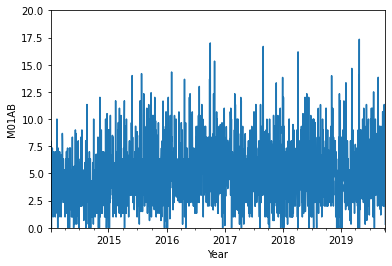

In [18]:
# Pandas Version
M01AB_ts.plot(ylim=[0, 20], legend=False)
plt.xlabel('Year'); plt.ylabel('M01AB')

In [19]:
# Create short time series from 2018 to 2018 using a slice 
M01AB_ts_1yr = M01AB_ts['2018':'2018']

In [20]:
# create a data frame with additional predictors from time series
# the following command adds a constant term, a trend term and a quadratic trend term
M01AB_df = tsatools.add_trend(M01AB_ts, trend='ctt')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
M01AB_df.head(10)

M01AB_Sales  const  trend  trend_squared
Date                                                
2014-01-02         0.00    1.0    1.0            1.0
2014-01-03         8.00    1.0    2.0            4.0
2014-01-04         2.00    1.0    3.0            9.0
2014-01-05         4.00    1.0    4.0           16.0
2014-01-06         5.00    1.0    5.0           25.0
2014-01-07         0.00    1.0    6.0           36.0
2014-01-08         5.33    1.0    7.0           49.0
2014-01-09         7.00    1.0    8.0           64.0
2014-01-10         5.00    1.0    9.0           81.0
2014-01-11         5.00    1.0   10.0          100.0

In [22]:
# fit a linear trend model to the time series
M01AB_lm = sm.ols(formula='M01AB_Sales ~ trend + trend_squared', data=M01AB_df).fit()

##### Plots that enhance the different components of the time series

(a) Zoom-in to 1 year of data 

(b) Original series with overlaid quadratic trendline

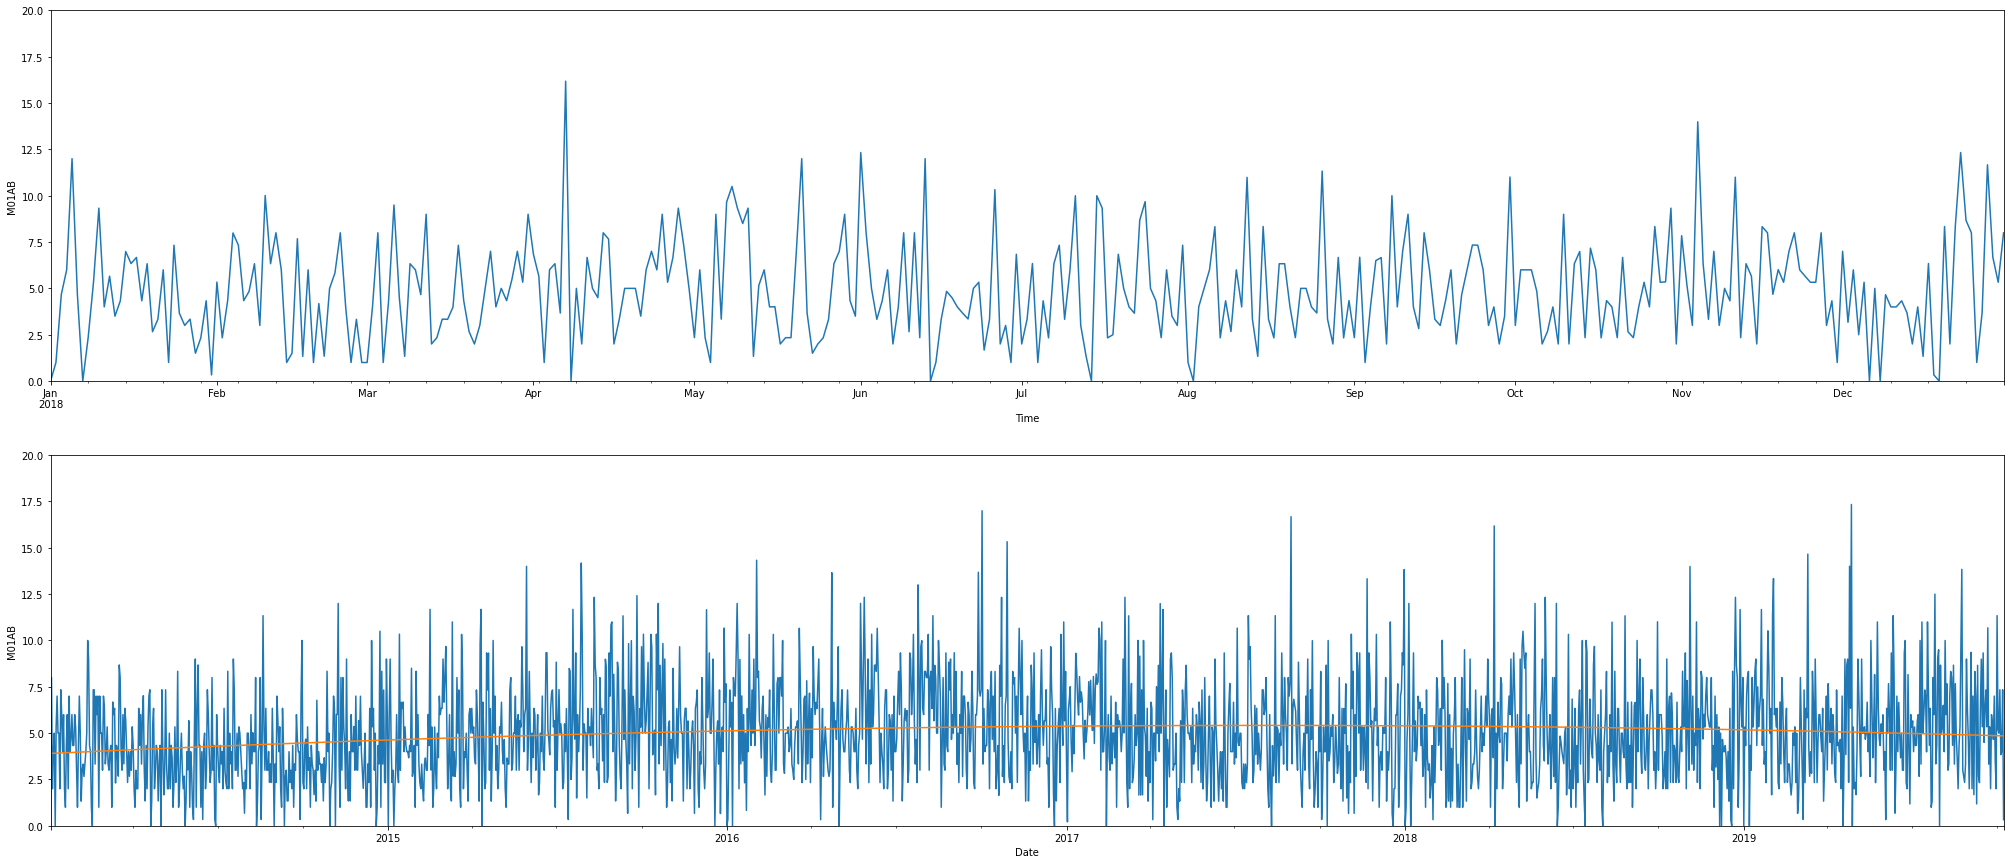

In [23]:
# shorter and longer time series
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(35, 15))
M01AB_ts_1yr.plot(ax=axes[0])
M01AB_ts.plot(ax=axes[1])
for ax in axes:
    ax.set_xlabel('Time')
    ax.set_ylabel('M01AB')
    ax.set_ylim(0, 20)
M01AB_lm.predict(M01AB_df).plot(ax=axes[1])
plt.show()

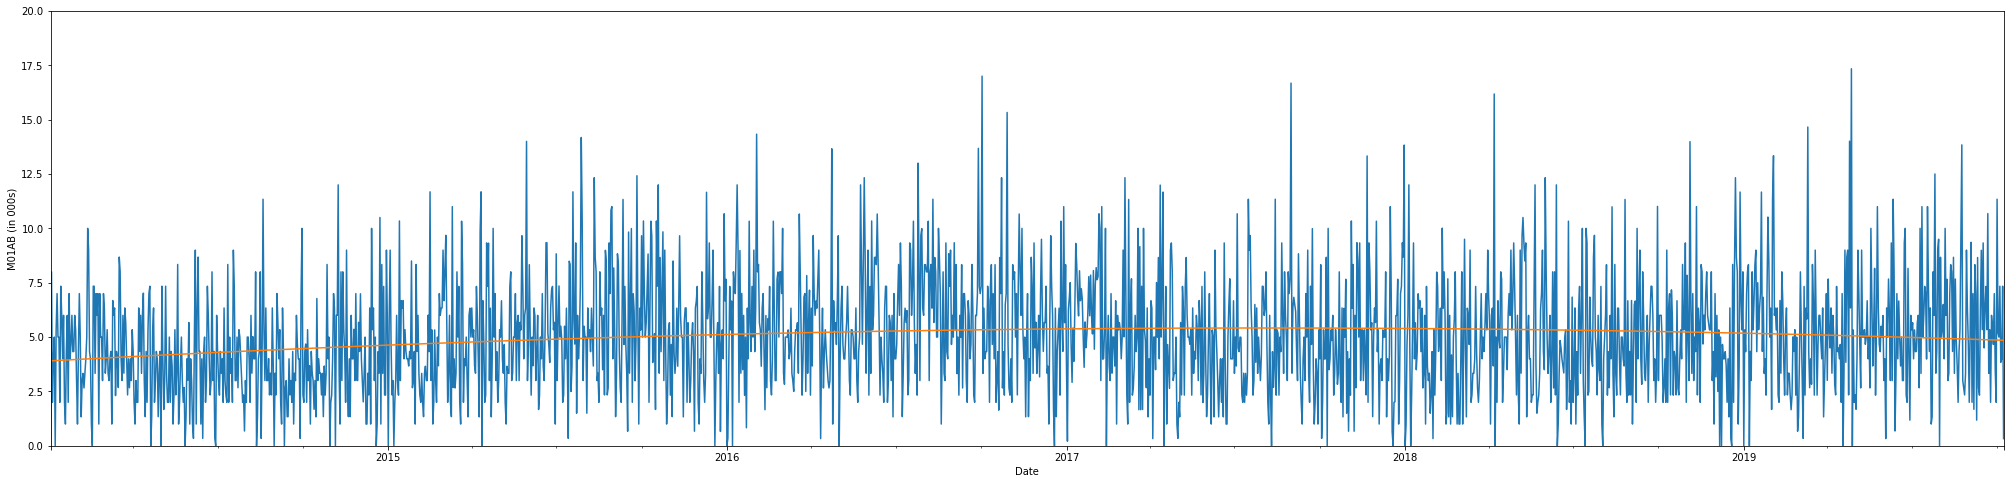

In [24]:
# plot the time series
ax = M01AB_ts.plot(figsize= (35, 8))
ax.set_xlabel('Time')
ax.set_ylabel('M01AB (in 000s)')
ax.set_ylim(0, 20)
M01AB_lm.predict(M01AB_df).plot(ax=ax)
plt.show()

In [25]:
nValid = 36
nTrain = len(M01AB_ts) - nValid
# partition the data
train_ts_M01AB = M01AB_ts[:nTrain]
valid_ts_M01AB = M01AB_ts[nTrain:]
# generate the naive and seasonal naive forecast
naive_pred_M01AB = pd.Series(train_ts_M01AB[-1], index=valid_ts_M01AB.index)
last_season_M01AB = train_ts_M01AB[-12:]
seasonal_pred_M01AB = pd.Series(pd.concat([last_season_M01AB]*5)[:len(valid_ts_M01AB)].values, index=valid_ts_M01AB.index)

In [26]:
train_ts_M01AB

Date
2014-01-02    0.00
2014-01-03    8.00
2014-01-04    2.00
2014-01-05    4.00
2014-01-06    5.00
              ... 
2019-08-29    9.00
2019-08-30    6.34
2019-08-31    4.68
2019-09-01    2.00
2019-09-02    5.33
Name: M01AB_Sales, Length: 2070, dtype: float64

In [27]:
valid_ts_M01AB

Date
2019-09-03     9.36
2019-09-04     2.00
2019-09-05     7.00
2019-09-06     1.68
2019-09-07     8.33
2019-09-08     7.01
2019-09-09     1.18
2019-09-10     8.66
2019-09-11     2.67
2019-09-12     2.33
2019-09-13     6.34
2019-09-14     8.99
2019-09-15     5.34
2019-09-16     9.33
2019-09-17     4.50
2019-09-18     6.33
2019-09-19     7.33
2019-09-20     5.34
2019-09-21    10.68
2019-09-22     3.33
2019-09-23     5.34
2019-09-24     2.00
2019-09-25     6.00
2019-09-26     5.50
2019-09-27     4.66
2019-09-28     7.00
2019-09-29     3.51
2019-09-30     2.00
2019-10-01    11.34
2019-10-02     5.18
2019-10-03     5.00
2019-10-04     7.34
2019-10-05     3.84
2019-10-06     4.00
2019-10-07     7.34
2019-10-08     0.33
Name: M01AB_Sales, dtype: float64

In [28]:
naive_pred_M01AB

Date
2019-09-03    5.33
2019-09-04    5.33
2019-09-05    5.33
2019-09-06    5.33
2019-09-07    5.33
2019-09-08    5.33
2019-09-09    5.33
2019-09-10    5.33
2019-09-11    5.33
2019-09-12    5.33
2019-09-13    5.33
2019-09-14    5.33
2019-09-15    5.33
2019-09-16    5.33
2019-09-17    5.33
2019-09-18    5.33
2019-09-19    5.33
2019-09-20    5.33
2019-09-21    5.33
2019-09-22    5.33
2019-09-23    5.33
2019-09-24    5.33
2019-09-25    5.33
2019-09-26    5.33
2019-09-27    5.33
2019-09-28    5.33
2019-09-29    5.33
2019-09-30    5.33
2019-10-01    5.33
2019-10-02    5.33
2019-10-03    5.33
2019-10-04    5.33
2019-10-05    5.33
2019-10-06    5.33
2019-10-07    5.33
2019-10-08    5.33
dtype: float64

In [29]:
last_season_M01AB

Date
2019-08-22     5.34
2019-08-23     9.67
2019-08-24    13.84
2019-08-25     3.00
2019-08-26     2.67
2019-08-27     2.34
2019-08-28     3.33
2019-08-29     9.00
2019-08-30     6.34
2019-08-31     4.68
2019-09-01     2.00
2019-09-02     5.33
Name: M01AB_Sales, dtype: float64

In [30]:
seasonal_pred_M01AB

Date
2019-09-03     5.34
2019-09-04     9.67
2019-09-05    13.84
2019-09-06     3.00
2019-09-07     2.67
2019-09-08     2.34
2019-09-09     3.33
2019-09-10     9.00
2019-09-11     6.34
2019-09-12     4.68
2019-09-13     2.00
2019-09-14     5.33
2019-09-15     5.34
2019-09-16     9.67
2019-09-17    13.84
2019-09-18     3.00
2019-09-19     2.67
2019-09-20     2.34
2019-09-21     3.33
2019-09-22     9.00
2019-09-23     6.34
2019-09-24     4.68
2019-09-25     2.00
2019-09-26     5.33
2019-09-27     5.34
2019-09-28     9.67
2019-09-29    13.84
2019-09-30     3.00
2019-10-01     2.67
2019-10-02     2.34
2019-10-03     3.33
2019-10-04     9.00
2019-10-05     6.34
2019-10-06     4.68
2019-10-07     2.00
2019-10-08     5.33
dtype: float64

##### Naive and Seasonal Naive Forecasts in a 3-year validation set for M01AB

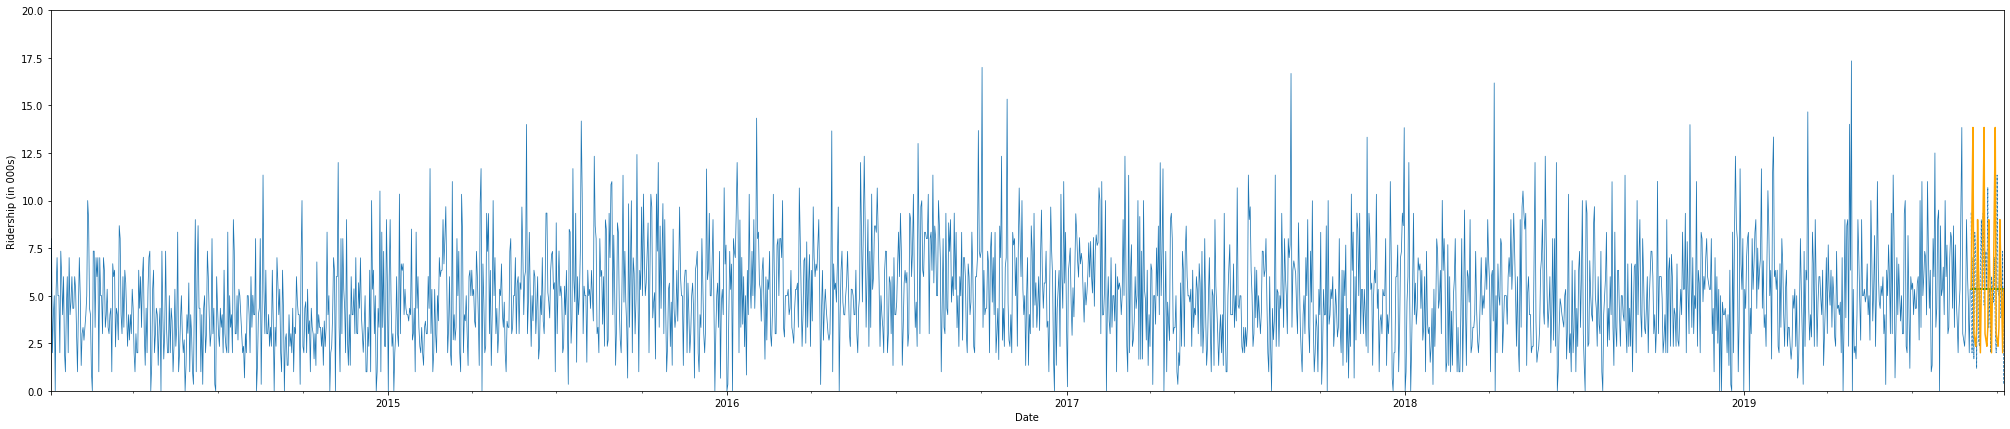

In [32]:
# plot forecasts and actual in the training and validation sets
ax = train_ts_M01AB.plot(color='C0', linewidth=0.75, figsize= (35,7))
valid_ts_M01AB.plot(ax=ax, color='C0', linestyle='dashed', linewidth=0.75)
#ax.set_xlim('2015', '2016')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
naive_pred_M01AB.plot(ax=ax, color='green')
seasonal_pred_M01AB.plot(ax=ax, color='orange')

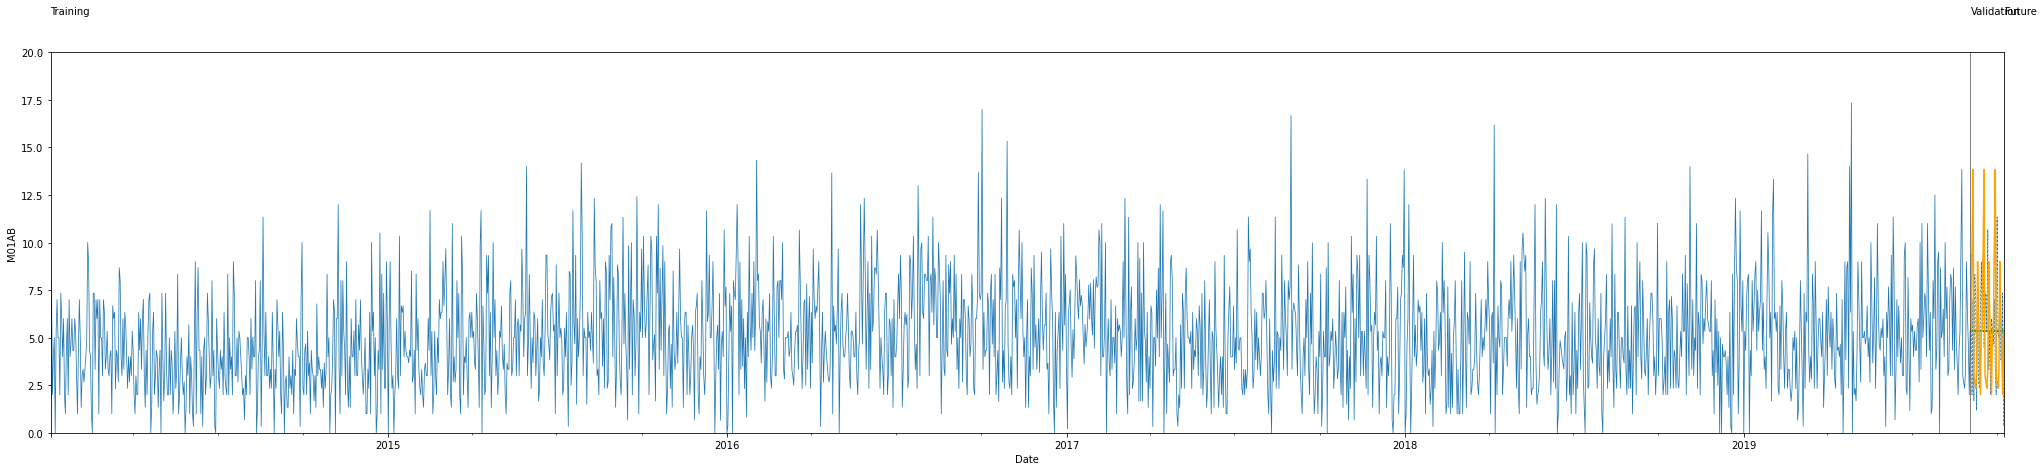

In [34]:
# plot forecasts and actual in the training and validation sets
ax = train_ts_M01AB.plot(color='C0', linewidth=0.75, figsize= (35,7))
valid_ts_M01AB.plot(ax=ax, color='C0', linestyle='dashed', linewidth=0.75)
#ax.set_xlim('2015', '2016')
ax.set_ylim(0, 20)
ax.set_xlabel('Time')
ax.set_ylabel('M01AB')
naive_pred_M01AB.plot(ax=ax, color='green')
seasonal_pred_M01AB.plot(ax=ax, color='orange')

# determine coordinates for drawing the arrows and lines
one_month = pd.Timedelta('31 days')
xtrain = (min(train_ts_M01AB.index), max(train_ts_M01AB.index) - one_month)
xvalid = (min(valid_ts_M01AB.index) + one_month, max(valid_ts_M01AB.index) - one_month)
xfuture = (max(valid_ts_M01AB.index) + one_month, '2020')
xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
xvf = xvalid[1] + 0.5 * (xfuture[0] - xvalid[1])
ax.add_line(plt.Line2D(xtrain, (2450, 2450), color='black', linewidth=0.5))
ax.add_line(plt.Line2D(xvalid, (2450, 2450), color='black', linewidth=0.5))
ax.add_line(plt.Line2D(xfuture, (2450, 2450), color='black', linewidth=0.5))
ax.text('2014', 22, 'Training')
ax.text('2019-09-03', 22, 'Validation')
ax.text('2019-10-09', 22, 'Future')
ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)
plt.show()

##### Predictive accuracy of naive and seasonal naive forecasts in the validation and training set for M01AB

Table below compares the accuracies of these two naive forecasts.
Because M01AB has monthly seasonality, the seasonal
naive forecast is the clear winner on both training and validation and
on all popular measures. In choosing between the two models, the
accuracy on the validation set is more relevant than the accuracy on
the training set. Performance on the validation set is more indicative
of how the models will perform in the future.

###### Validation Set

In [37]:
regressionSummary(valid_ts_M01AB, naive_pred_M01AB)


Regression statistics

                      Mean Error (ME) : 0.1731
       Root Mean Squared Error (RMSE) : 2.7432
            Mean Absolute Error (MAE) : 2.2325
          Mean Percentage Error (MPE) : -70.3831
Mean Absolute Percentage Error (MAPE) : 98.4098


In [38]:
 regressionSummary(valid_ts_M01AB, seasonal_pred_M01AB)


Regression statistics

                      Mean Error (ME) : -0.1253
       Root Mean Squared Error (RMSE) : 4.5251
            Mean Absolute Error (MAE) : 3.6464
          Mean Percentage Error (MPE) : -75.0077
Mean Absolute Percentage Error (MAPE) : 121.3996


###### Training set

In [39]:
# calculate naive metrics for training set (shifted by 1 month)
regressionSummary(train_ts_M01AB[1:], train_ts_M01AB[:-1])


Regression statistics

               Mean Error (ME) : 0.0026
Root Mean Squared Error (RMSE) : 3.7529
     Mean Absolute Error (MAE) : 2.9228


In [40]:
 # calculate seasonal naive metrics for training set (shifted by 12 months)
regressionSummary(train_ts_M01AB[12:], train_ts_M01AB[:-12])


Regression statistics

               Mean Error (ME) : 0.0082
Root Mean Squared Error (RMSE) : 3.7524
     Mean Absolute Error (MAE) : 2.9416


### Regression Based Forecasting